## Importing required modules.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import tensorflow as tf
import string
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

## Importing datasets.

In [2]:
train = pd.read_csv('/kaggle/input/handwriting-recognition/written_name_train_v2.csv')
valid = pd.read_csv('/kaggle/input/handwriting-recognition/written_name_validation_v2.csv')

In [3]:
print(train.describe())
print(train.info())

               FILENAME IDENTITY
count            330961   330396
unique           330961   100539
top     TRAIN_00001.jpg   THOMAS
freq                  1     1825
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330961 entries, 0 to 330960
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   FILENAME  330961 non-null  object
 1   IDENTITY  330396 non-null  object
dtypes: object(2)
memory usage: 5.1+ MB
None


In [4]:
print(valid.describe())
print(valid.info())

                   FILENAME IDENTITY
count                 41370    41292
unique                41370    20227
top     VALIDATION_0001.jpg   THOMAS
freq                      1      219
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41370 entries, 0 to 41369
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   FILENAME  41370 non-null  object
 1   IDENTITY  41292 non-null  object
dtypes: object(2)
memory usage: 646.5+ KB
None


In [5]:
print(train.columns)
print(valid.columns)

Index(['FILENAME', 'IDENTITY'], dtype='object')
Index(['FILENAME', 'IDENTITY'], dtype='object')


In [6]:
print("Data types: \n{}".format(train.dtypes))
print("Data types: \n{}".format(valid.dtypes))

Data types: 
FILENAME    object
IDENTITY    object
dtype: object
Data types: 
FILENAME    object
IDENTITY    object
dtype: object


In [7]:
train.isnull().sum()
train=train.dropna()

In [8]:
valid.isnull().sum()
valid=valid.dropna()

In [9]:
print(train.shape)
print(valid.shape)

(330396, 2)
(41292, 2)


In [10]:
print(train.value_counts())

FILENAME          IDENTITY 
TRAIN_00001.jpg   BALTHAZAR    1
TRAIN_291526.jpg  CAMPOURCY    1
TRAIN_291506.jpg  BELLO        1
TRAIN_291505.jpg  BOISSIERE    1
TRAIN_291504.jpg  LOUNA        1
                              ..
TRAIN_191201.jpg  CHOMEL       1
TRAIN_191200.jpg  BARDIN       1
TRAIN_19120.jpg   LAURI-ANN    1
TRAIN_191199.jpg  TILLEMAN     1
TRAIN_99999.jpg   DIMITRI      1
Length: 330396, dtype: int64


In [11]:
print(valid.value_counts())

FILENAME              IDENTITY        
VALIDATION_0001.jpg   BILEL               1
VALIDATION_34138.jpg  GLI                 1
VALIDATION_34158.jpg  GILLES              1
VALIDATION_34159.jpg  VINCENT             1
VALIDATION_3416.jpg   NATHAN              1
                                         ..
VALIDATION_21627.jpg  HAMEAU              1
VALIDATION_21628.jpg  FIGUERES CAUMONT    1
VALIDATION_21629.jpg  XU                  1
VALIDATION_2163.jpg   MENDES              1
VALIDATION_9999.jpg   BABIN-PELTIER       1
Length: 41292, dtype: int64


#### Verifying.

In [12]:
train.isnull().any()

FILENAME    False
IDENTITY    False
dtype: bool

In [13]:
valid.isnull().any()

FILENAME    False
IDENTITY    False
dtype: bool

## Pre processing and modifying the data for further use.

In [14]:
list_a=list(train.columns)

In [15]:
list_cate=[]
for i in list_a:
    if train[i].dtype=='object':
        list_cate.append(i)

In [16]:
le=LabelEncoder()

In [17]:
for i in list_cate:
    train[i]=le.fit_transform(train[i])

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330396 entries, 0 to 330960
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   FILENAME  330396 non-null  int64
 1   IDENTITY  330396 non-null  int64
dtypes: int64(2)
memory usage: 7.6 MB


In [19]:
train.describe()

,FILENAME,IDENTITY
count,330396.000000,330396.000000
mean,165197.500000,50140.602256
std,95377.254107,28615.108748
min,0.000000,0.000000
25%,82598.750000,25295.750000
50%,165197.500000,51699.000000
75%,247796.250000,72625.000000
max,330395.000000,100538.000000


In [20]:
train

,FILENAME,IDENTITY
0,0,6790
1,1,88373
2,2,9411
3,3,54452
4,4,24870
...,...,...
330956,263609,59046
330957,263610,92820
330958,263611,23178
330959,263613,70125


In [21]:
X = train.drop('FILENAME',axis=1)
y = train['FILENAME']

### Making graph.

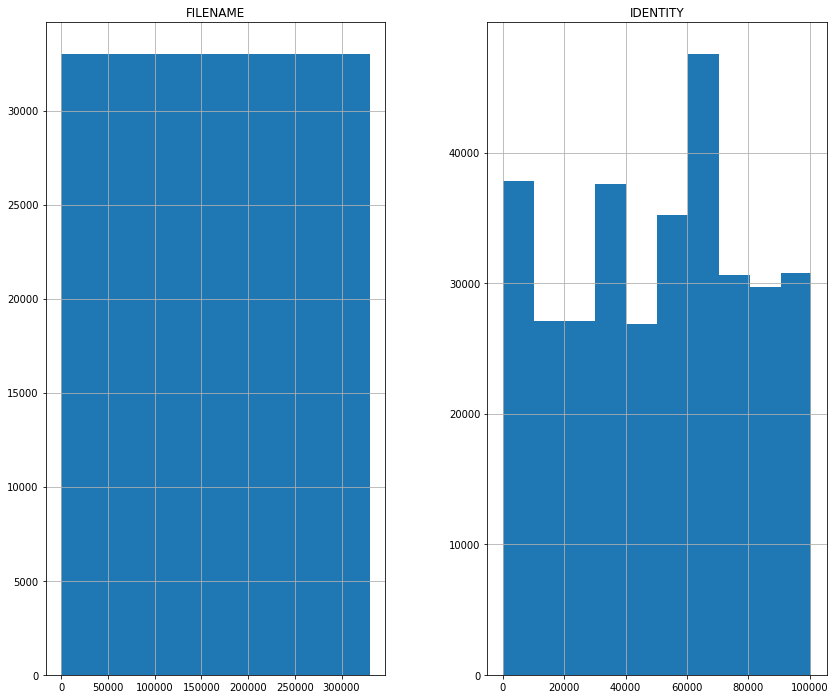

In [22]:
train.hist(figsize=(14,12))
plt.show()

In [23]:
train.corr()

,FILENAME,IDENTITY
FILENAME,1.000000,0.000385
IDENTITY,0.000385,1.000000


## Heatmap.

<AxesSubplot:>

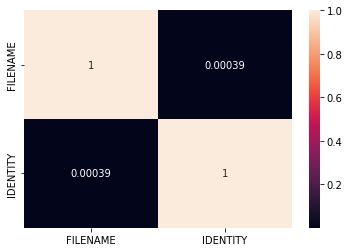

In [24]:
plt.figure(figsize = (6,4))

sns.heatmap(train.corr(), annot = True)

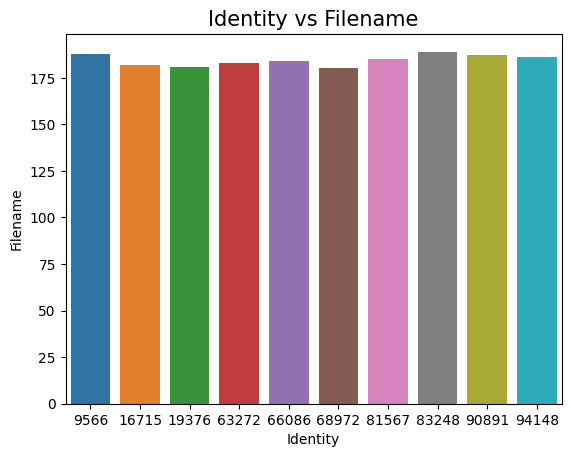

In [25]:
plt.style.use("default")
sns.barplot(x="IDENTITY", y="FILENAME",data=train[180:190])
plt.title("Identity vs Filename",fontsize=15)
plt.xlabel("Identity")
plt.ylabel("Filename")
plt.show()

## Line Plot.

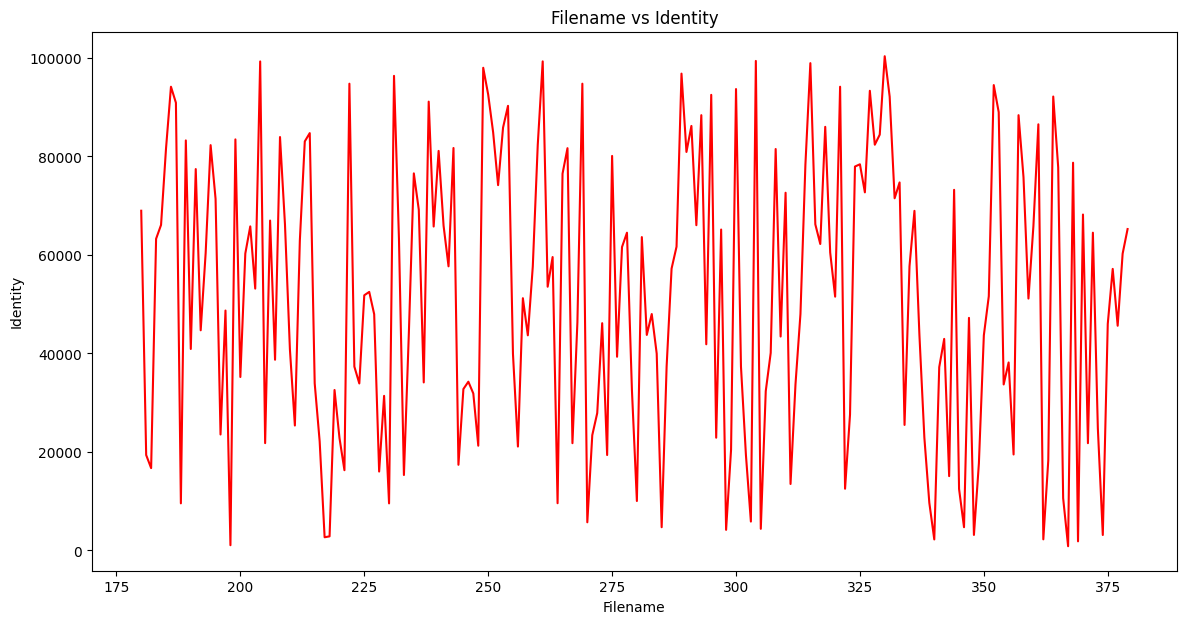

In [26]:
plt.style.use("default")
plt.figure(figsize=(14,7))
sns.lineplot(x = "FILENAME",y = "IDENTITY",data = train[180:380], color='r')
plt.title("Filename vs Identity")
plt.xlabel("Filename")
plt.ylabel("Identity")
plt.show()

Training and testing data.

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=12)

In [28]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

231277
99119
231277
99119


# Deep learning 

In [29]:
model = tf.keras.Sequential([
      tf.keras.layers.Dense(units=80,activation='relu',name = 'input_layer'),
      tf.keras.layers.Dense(units=60,activation='relu',name = 'dense_layer1'),
      tf.keras.layers.Dense(units=40,activation='relu',name = 'dense_layer2'),
      tf.keras.layers.Dense(units=1,name='Output_layer')
],name='Model') 


        
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',       
    metrics=['binary_accuracy'],
)


history = model.fit(X_train,y_train,batch_size=256,
    epochs=150,

                   )

2022-05-14 06:55:27.388996: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-14 06:55:27.507104: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-14 06:55:27.508055: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-14 06:55:27.509336: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/150
904/904 [==============================] - 5s 3ms/step - loss: -2520160.7500 - binary_accuracy: 4.3238e-06
Epoch 2/150
904/904 [==============================] - 3s 3ms/step - loss: -2520222.2500 - binary_accuracy: 4.3238e-06
Epoch 3/150
904/904 [==============================] - 2s 3ms/step - loss: -2520221.5000 - binary_accuracy: 4.3238e-06
Epoch 4/150
904/904 [==============================] - 2s 3ms/step - loss: -2520222.0000 - binary_accuracy: 4.3238e-06
Epoch 5/150
904/904 [==============================] - 2s 3ms/step - loss: -2520222.5000 - binary_accuracy: 4.3238e-06
Epoch 6/150
904/904 [==============================] - 2s 3ms/step - loss: -2520223.2500 - binary_accuracy: 4.3238e-06
Epoch 7/150
904/904 [==============================] - 3s 3ms/step - loss: -2520223.2500 - binary_accuracy: 4.3238e-06
Epoch 8/150
904/904 [==============================] - 2s 3ms/step - loss: -2520220.7500 - binary_accuracy: 4.3238e-06
Epoch 9/150
904/904 [===========================

In [30]:
y_pred = model.predict(X_test)
y_pred

array([[ 7691.328],
       [ 7489.811],
       [32374.734],
       ...,
       [35860.977],
       [26693.572],
       [12200.068]], dtype=float32)

<AxesSubplot:>

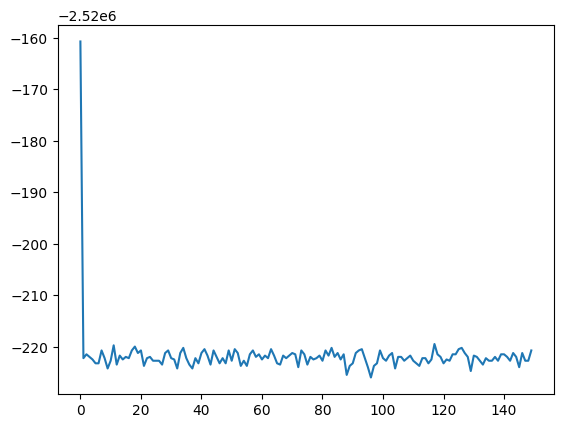

In [31]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot()

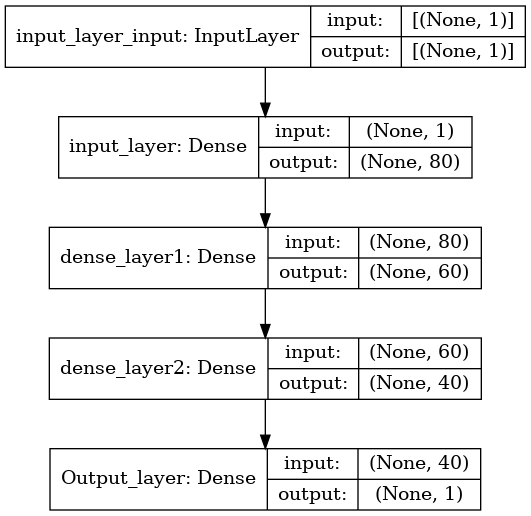

In [32]:
plot_model(model, show_shapes = True)

Best Validation Loss: -2520226.0000
Best Validation Accuracy: 0.0000


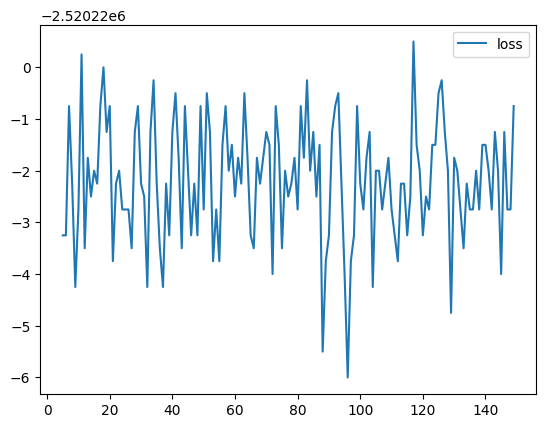

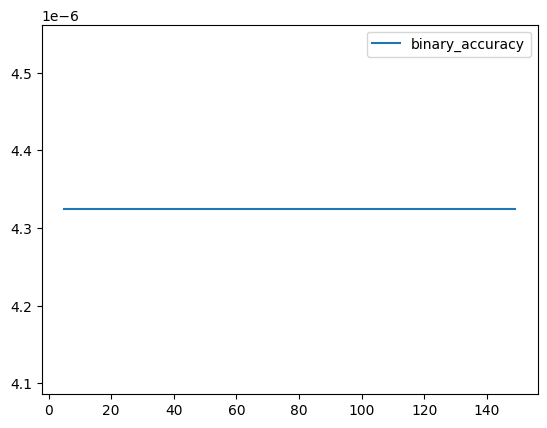

In [33]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss']].plot()
history_df.loc[5:, ['binary_accuracy']].plot()
print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['loss'].min(), 
              history_df['binary_accuracy'].max()))

In [34]:
early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [35]:
model.evaluate(X_test,y_test)

3098/3098 [==============================] - 6s 2ms/step - loss: -2516485.5000 - binary_accuracy: 0.0000e+00


[-2516485.5, 0.0]

# Thank you.